In [5]:
import pickle
import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import glob
from scipy.signal import savgol_filter

In [24]:
class Prep_Data():
    def __init__(self, path=None):
        with open(path, "rb") as p:
            data = pickle.load(p)
        
        self.vels = data["vels"]
        self.kds = data["kds"]
        self.dvs = data["dvs"]        
        self.states = data["states"]
        self.vels_smooth = savgol_filter(self.vels, 201, 3)
        self.label = path.split("data/")[-1].split("_/")[0]

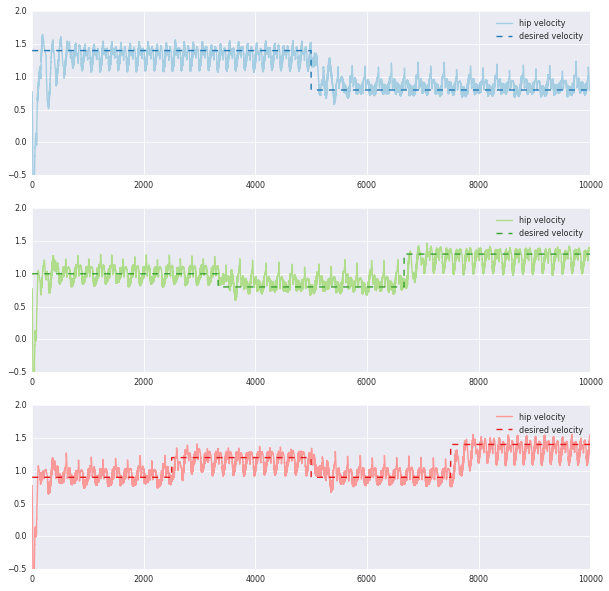

In [47]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1)
colors = sns.color_palette("Paired")

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,10))

d1 = Prep_Data(path="demo/data/vary_1.4_0.8_/vary_1.4_0.8_.pkl")
ax1.plot(d1.vels, "-", color=colors[0], label="hip velocity")
ax1.plot(d1.dvs, "--", color=colors[1], label="desired velocity")
ax1.set_ylim(-0.5, 2.0)
ax1.legend(loc=0)

d2 = Prep_Data(path="demo/data/vary_1.0_0.8_1.3_/vary_1.0_0.8_1.3_.pkl")
ax2.plot(d2.vels, "-", color=colors[2], label="hip velocity")
ax2.plot(d2.dvs, "--", color=colors[3], label="desired velocity")
ax2.set_ylim(-0.5, 2.0)
ax2.legend(loc=0)

d3 = Prep_Data(path="demo/data/vary_0.9_1.2_0.9_1.4_/vary_0.9_1.2_0.9_1.4_.pkl")
ax3.plot(d3.vels, "-", color=colors[4], label="hip velocity")
ax3.plot(d3.dvs, "--", color=colors[5], label="desired velocity")
ax3.set_ylim(-0.5, 2.0)
ax3.legend(loc=1)


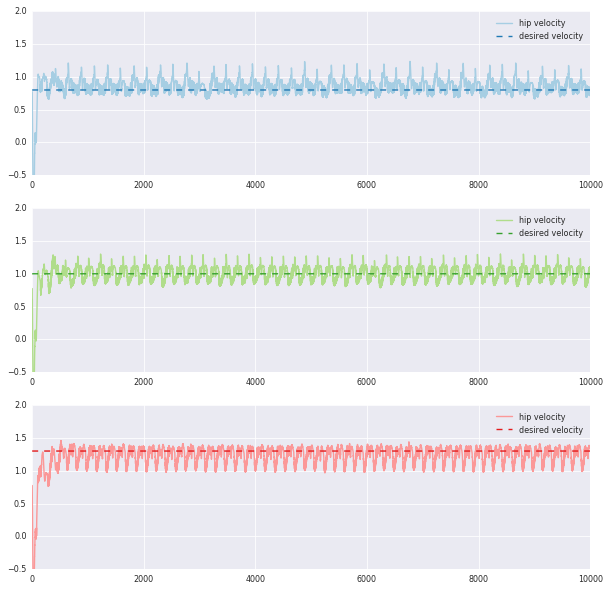

In [48]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1)
colors = sns.color_palette("Paired")

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,10))

d1 = Prep_Data(path="demo/data/fix_0.8_/fix_0.8.pkl")
ax1.plot(d1.vels, "-", color=colors[0], label="hip velocity")
ax1.plot(d1.dvs, "--", color=colors[1], label="desired velocity")
ax1.set_ylim(-0.5, 2.0)
ax1.legend(loc=0)

d2 = Prep_Data(path="demo/data/fix_1.0_/fix_1.0.pkl")
ax2.plot(d2.vels, "-", color=colors[2], label="hip velocity")
ax2.plot(d2.dvs, "--", color=colors[3], label="desired velocity")
ax2.set_ylim(-0.5, 2.0)
ax2.legend(loc=0)

d3 = Prep_Data(path="demo/data/fix_1.3_/fix_1.3.pkl")
ax3.plot(d3.vels, "-", color=colors[4], label="hip velocity")
ax3.plot(d3.dvs, "--", color=colors[5], label="desired velocity")
ax3.set_ylim(-0.5, 2.0)
ax3.legend(loc=1)

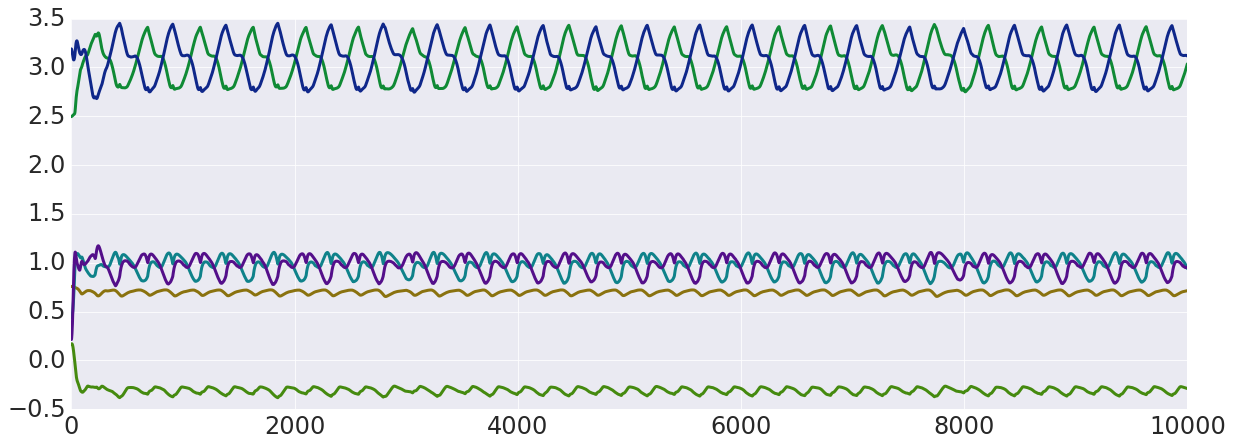

In [29]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=3)
colors = sns.hls_palette(8, l=.3, s=.8)

d = Prep_Data(path="demo/data/fix_0.8_/fix_0.8.pkl")
f, ax = plt.subplots(1, figsize=(20, 7))
for i in list(range(1,7)):
    ax.plot(d.states.T[i], "-", linewidth=3, color=colors[i], label="joint_position_"+str(i))


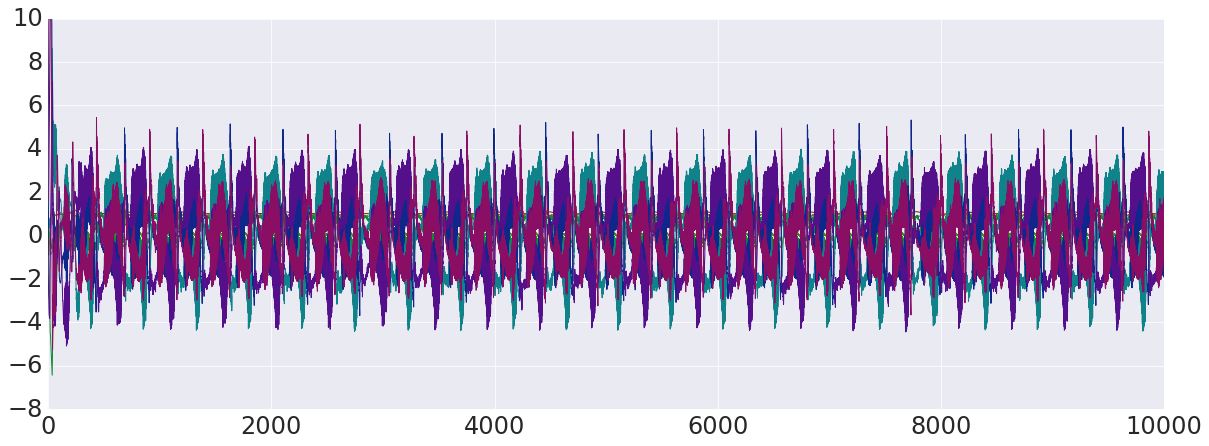

In [35]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=3)
colors = sns.hls_palette(8, l=.3, s=.8)

d = Prep_Data(path="demo/data/fix_0.8_/fix_0.8.pkl")
f, ax = plt.subplots(1, figsize=(20, 7))
for i in list(range(8)):
    ax.plot(d.states.T[i+6], "-", linewidth=1, color=colors[i], label="joint_position_"+str(i+6))

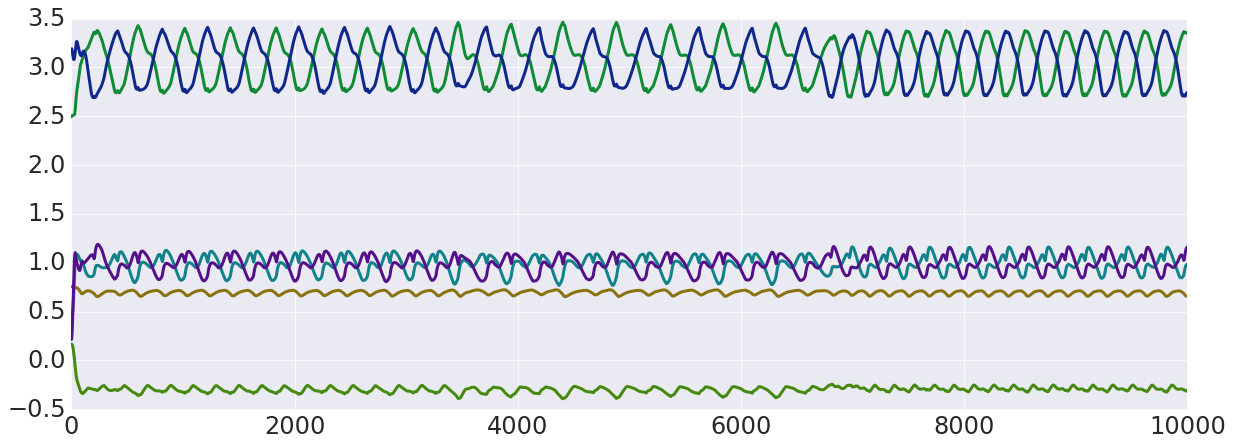

In [38]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=3)
colors = sns.hls_palette(8, l=.3, s=.8)

d = Prep_Data(path="demo/data/vary_1.0_0.8_1.3_/vary_1.0_0.8_1.3_.pkl")
f, ax = plt.subplots(1, figsize=(20, 7))
for i in list(range(1,7)):
    ax.plot(d.states.T[i], "-", linewidth=3, color=colors[i], label="joint_position_"+str(i))


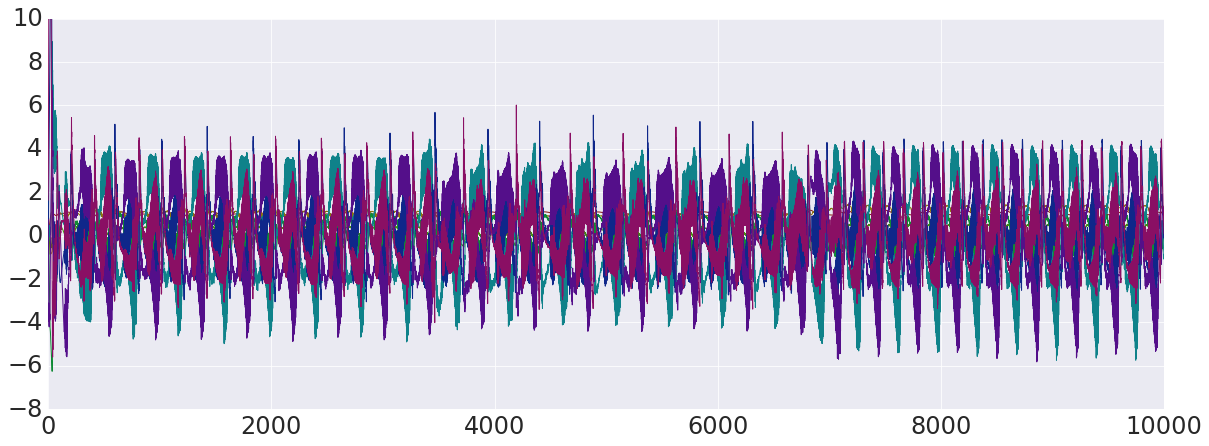

In [39]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=3)
colors = sns.hls_palette(8, l=.3, s=.8)

d = Prep_Data(path="demo/data/vary_1.0_0.8_1.3_/vary_1.0_0.8_1.3_.pkl")
f, ax = plt.subplots(1, figsize=(20, 7))
for i in list(range(8)):
    ax.plot(d.states.T[i+6], "-", linewidth=1, color=colors[i], label="joint_position_"+str(i+6))

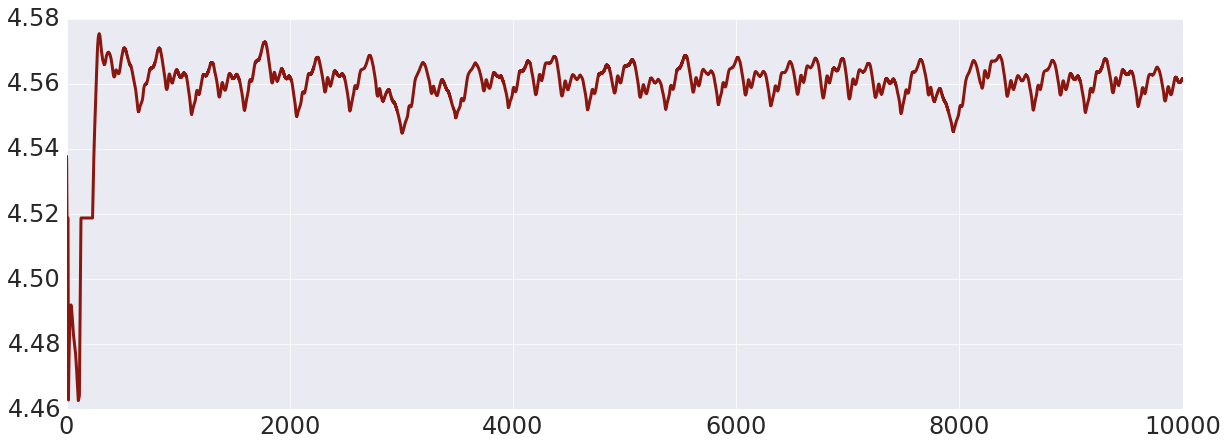

In [5]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=3)
colors = sns.hls_palette(8, l=.3, s=.8)

d = Prep_Data(path="demo/data/fix_0.8_/fix_0.8.pkl")
f, ax = plt.subplots(1, figsize=(20, 7))
ax.plot(d.kds, "-", linewidth=3, color=colors[0])

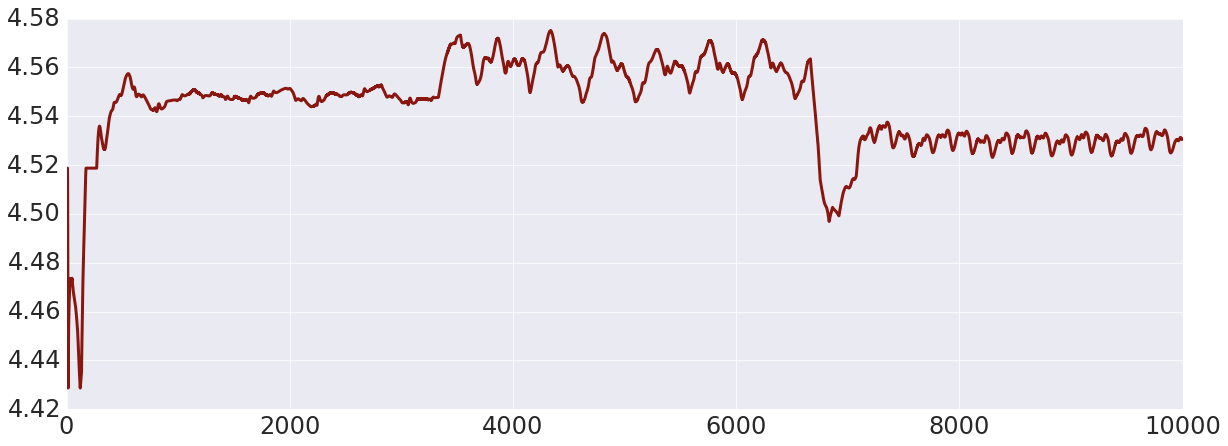

In [6]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=3)
colors = sns.hls_palette(8, l=.3, s=.8)

d = Prep_Data(path="demo/data/vary_1.0_0.8_1.3_/vary_1.0_0.8_1.3_.pkl")
f, ax = plt.subplots(1, figsize=(20, 7))
ax.plot(d.kds, "-", linewidth=3, color=colors[0])

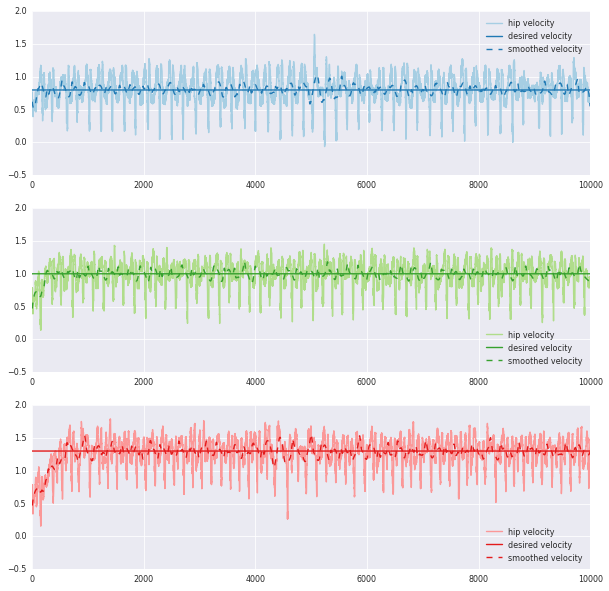

In [31]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1)
colors = sns.color_palette("Paired")

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,10))

d1 = Prep_Data(path="log/data/fix_0.8_/fix_0.8.pkl")
ax1.plot(d1.vels, "-", color=colors[0], label="hip velocity")
ax1.plot(d1.dvs, "-", color=colors[1], label="desired velocity")
ax1.plot(d1.vels_smooth, "--", color=colors[1], label="smoothed velocity")
ax1.set_ylim(-0.5, 2.0)
ax1.legend(loc=0)

d2 = Prep_Data(path="log/data/fix_1.0_/fix_1.0.pkl")
ax2.plot(d2.vels, "-", color=colors[2], label="hip velocity")
ax2.plot(d2.dvs, "-", color=colors[3], label="desired velocity")
ax2.plot(d2.vels_smooth, "--", color=colors[3], label="smoothed velocity")
ax2.set_ylim(-0.5, 2.0)
ax2.legend(loc=0)

d3 = Prep_Data(path="log/data/fix_1.3_/fix_1.3.pkl")
ax3.plot(d3.vels, "-", color=colors[4], label="hip velocity")
ax3.plot(d3.dvs, "-", color=colors[5], label="desired velocity")
ax3.plot(d3.vels_smooth, "--", color=colors[5], label="smoothed velocity")
ax3.set_ylim(-0.5, 2.0)
ax3.legend(loc=0)

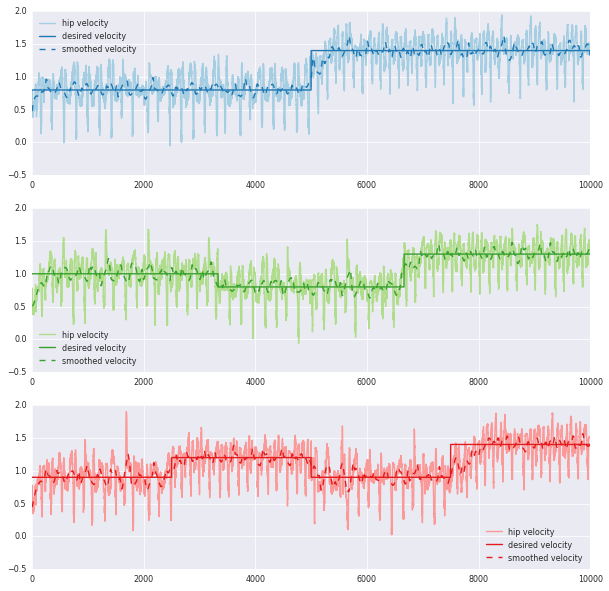

In [32]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1)
colors = sns.color_palette("Paired")

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,10))

d1 = Prep_Data(path="log/data/vary_0.8_1.4_/vary_0.8_1.4_.pkl")
ax1.plot(d1.vels, "-", color=colors[0], label="hip velocity")
ax1.plot(d1.dvs, "-", color=colors[1], label="desired velocity")
ax1.plot(d1.vels_smooth, "--", color=colors[1], label="smoothed velocity")
ax1.set_ylim(-0.5, 2.0)
ax1.legend(loc=0)

d2 = Prep_Data(path="log/data/vary_1.0_0.8_1.3_/vary_1.0_0.8_1.3_.pkl")
ax2.plot(d2.vels, "-", color=colors[2], label="hip velocity")
ax2.plot(d2.dvs, "-", color=colors[3], label="desired velocity")
ax2.plot(d2.vels_smooth, "--", color=colors[3], label="smoothed velocity")
ax2.set_ylim(-0.5, 2.0)
ax2.legend(loc=0)

d3 = Prep_Data(path="log/data/vary_0.9_1.2_0.9_1.4_/vary_0.9_1.2_0.9_1.4_.pkl")
ax3.plot(d3.vels, "-", color=colors[4], label="hip velocity")
ax3.plot(d3.dvs, "-", color=colors[5], label="desired velocity")
ax3.plot(d3.vels_smooth, "--", color=colors[5], label="smoothed velocity")
ax3.set_ylim(-0.5, 2.0)
ax3.legend(loc=0)

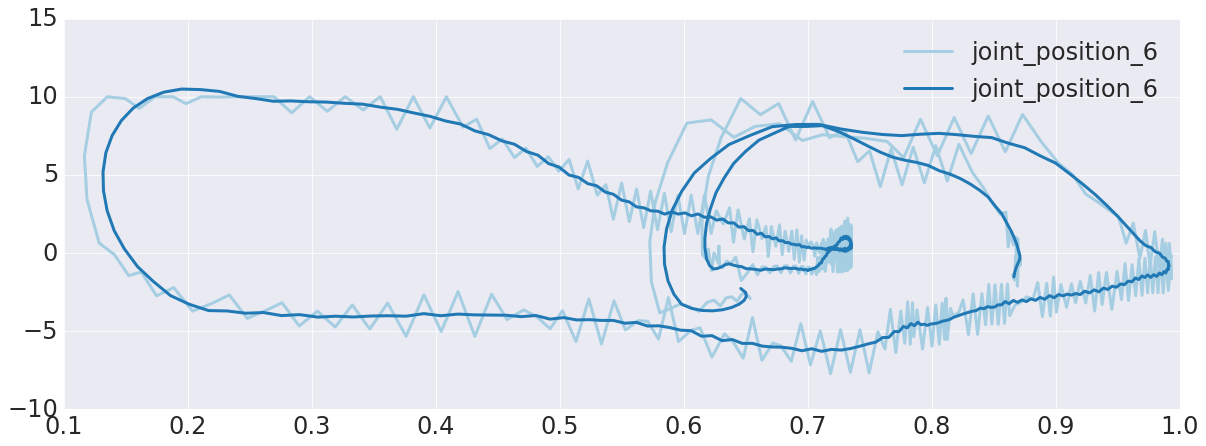

In [57]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=3)
# colors = sns.hls_palette(8, l=.3, s=.8)
colors = sns.color_palette("Paired")

d = Prep_Data(path="log/data/fix_1.0_/fix_1.0.pkl")
f, ax = plt.subplots(1, figsize=(20, 7))
start = 2000
cycle = 440
i = 6
# for i in list(range(3,7)):
ax.plot(d.states.T[i][start:start+cycle], 
        d.states.T[i+6][start:start+cycle], "-", 
        linewidth=3, color=colors[0], label="joint_position_"+str(i))
ax.plot(savgol_filter(d.states.T[i][start:start+cycle], 21, 3), 
        savgol_filter(d.states.T[i+6][start:start+cycle], 21, 3), "-", 
        linewidth=3, color=colors[1], label="joint_position_"+str(i))
ax.legend(loc=1)
